### The three sources of errors

Machine Learning 모델은 대개 세가지 오류 때문에 애를 먹는다

1. **bias** : 이 오류는 비현실적인 가정에서 비롯된다. 편향이 너무 크면 machine learning 알고리즘이 특성과 결과 간의 중요한 관계를 인식하는 데 실패한다. 이 상황에 알고리즘이 `underfitting`되었다고 한다.
2. **variance** : 이 오류는 훈련 데이터의 작은 변화에 대한 민감도에서 비롯된다. 분산이 높으면 알고리즘은 훈련 데이터셋을 과적합한 것이며, 이로인해 훈련 데이터셋의 아주 작은 변화에 대해서도 완전히 다른 예측을 할 수 있다. 훈련 데이터셋의 일반적인 패턴을 모델링하는 대신, 알고리즘은 신호를 잡음으로 간주한다.
3. **noise** : 예측하지 못한 변화나 측정 오류와 같은 관측값의 분산 때문에 발생한다. 더 이상 줄일 수 없는 오류이므로 어떤 모델로도 해결하지 못한다.

관측값 $(x_i)_{i=1, \dots, n}$의 훈련 데이터셋과 실수값 결과 $(y_i)_{i=1,\dots,n}$이 있다고 가정하자. 함수 $f[x]$가 있으며, $y = f[x] + \epsilon$이며, 여기서 $\epsilon$이며, 여기서 $\epsilon$은 $E[\epsilon_i] = 0$이고, $E[\epsilon_i^2] = \sigma_\epsilon^2$인 백색 잡음이다. 
$f[x]$를 가장 잘 적합화하는 함수 $\hat{f[x]}$를 추정하는데, 예측 오차의 분산을 최소화하는 방법을 활용한다. 이 평균 오차는 다음처럼 분해할 수 있다.

$$E \left[(y_i - \hat{f[x_i]})^2 \right] = \left(\left[ E[\hat{f[x_i]} - f[x_i]]\right]\right) + V\left[\hat{f[x_i]} \right] + \sigma_\epsilon^2$$

Ensemble methods는 일련의 모두 같은 학습 알고리즘을 기반으로 하는 약한 학습기들을 병합함으로써 개별 학습기보다 더 좋은 성능을 발휘하는 학습기를 생성하는 것이다. Ensemble method는 편향 또는 분산을 축소하는데 도움을 준다


### Bagging

배깅은 예측 시 분산을 축소하는 효과적인 방법이다. 다음과 같이 작동한다

1. 복원 랜덤 표본 추출(Bootstrapping)을 통해 N개의 훈련 데이터셋을 생성한다
2. 각각의 훈련 데이터셋에 적합화된 N개 추청 계수를 구한다. 이 추정 계수들은 각각 독립적으로 적합화되므로 모델들은 병렬로 적합화할 수 있다.
3. 앙상블 예측은 N모댈로부터 생성된 각 개별 예측의 단순 평균이다. 범주형 변수의 경우 관측치가 어떤 클래스에 속할 확률은 관측을 그 클래스 멤버로 분류한 추정기의 비율로 계산한다. 기초 추정기가 예측 확률을 갖고 예측할 수 있으면 배깅 분류기는 확률의 평균을 도출할 수 있다.

#### 분산 축소

배깅의 주요 장점은 예측의 분산을 줄이는 것이다. 그러므로 과적합을 해결하는 데 도움이 된다. 배깅된 예측의 분산은 배깅된 추정 계수, 단일 추정 계수 예측의 평균, 분산, 그리고 이들 예측 간의 평균 상관관계의 함수다
$$
\begin{matrix}
V \left[ \frac{1}{N} \sum_{i=1}^N \varphi_i[c]\right] &=& \frac{1}{N^2}\sum_{i=1}^N \left( \sum_{j=1}^N \sigma_{i,j}\right) \\
       &=& \frac{1}{N^2} \sum_{i=1}^N \left( \sigma_i^2 + \sum_{j \neq i}^N \sigma_i \sigma_j \rho_{i,j}\right) \\
       &=& \frac{1}{N^2} \sum_{i=1}^N \left( \bar{\sigma}^2 + \sum_{j \neq i}^N  \bar_{\sigma} ^2 \bar{\rho}\right) \\
       &=& \frac{\bar{\sigma}^2 + (N-1)\bar{\sigma}^2 \bar{\rho}}{N} \\
       &=& \bar{\sigma}^2 \left( \bar {\rho} + \frac{1 - \bar{\rho}}{N}\right)
\end{matrix}
$$

여기서 $\sigma_{i,j}$는 추정기 $i,j$에 의한 예측의 공분산이다. $\sum_{i=1}^N \bar{\sigma}^2 = \sum_{i=1}^N \sigma_i^2 \Leftrightarrow \bar{\sigma}^2 = N^{-1}\sum_{i=1}^N \sigma_i^2$이고, $\sum_{j \neq i}^N \bar{\sigma}^2 \bar{\rho} = \sum_{j \neq i}^N \sigma_i \sigma_j \sigma_{i,j} \Leftrightarrow \bar{\rho}^2 = \left( \sigma^2 N(N-1)\right)^{-1} \sum_{j \neq i}^N \sigma_i \sigma_j \sigma_{i,j}$이다. 아래의 코드는 배깅된 예측의 표준 편차를 시각화해준다. 

In [1]:
import numpy as np
import pandas as pd

def ensemble_variance(N, sigma_bar, rho_bar):
    variance = sigma_bar**2 * (rho_bar + (1 - rho_bar) / N)
    return variance

N_range = range(5, 51)
rho_range = np.linspace(0, 1, 101)
sigma_bar = 1  

results = pd.DataFrame(columns = np.round(rho_range, 2), index = N_range[::-1])

In [2]:
for N in N_range:
    for rho_bar in rho_range:
        variance = ensemble_variance(N, sigma_bar, rho_bar)
        results.loc[N, np.round(rho_bar, 2)] = variance

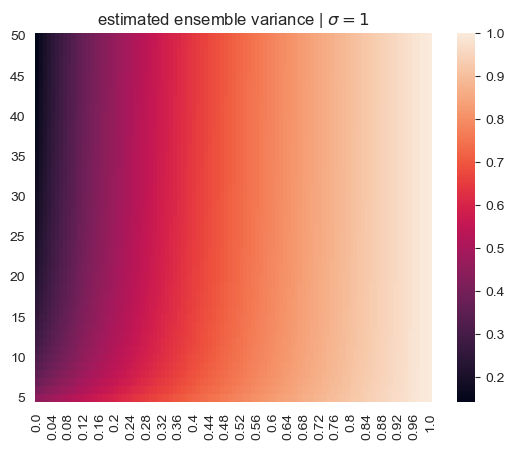

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(np.sqrt(results.astype(float)))
plt.yticks(
    ticks=np.arange(0, len(results.index), 5) + 0.5, 
    labels=results.index[::5],
    rotation = 0
)
plt.title(r'estimated ensemble variance | $\sigma = 1$')
plt.show()

위 과정은 $\bar{\rho} \rightarrow 1 \Rightarrow V \left[ \frac{1}{N} \sum_{i=1}^N \varphi_i[c]\right] \rightarrow \bar{\sigma}^2$ 이므로, 배깅이 $\bar{\rho} < 1$에 대해서만 효과적이라는 것을 식에서 보여준다. Sequential Bootstrapping의 목표 중 하나는 최대한 독립적인 표본을 추출해 $\bar{\rho}$를 감소시키는 것으로, 결과적으로 이는 Bagging 분류기의 분산을 낮춘다. 위 그림은 배깅된 예측의 표준 편차를 $N \in [5, 50], \rho \in [0,1], \bar{\sigma} = 1$의 함수로 표현한 heatmap이다.

#### 개선된 정확도

N개의 독립된 분류 기간의 다수결에 의해 k개 클래스를 예측하는 배깅 분류기를 생각해 보자. 예측은 {0,1}로 labeling할 수 있는데, 여기서 1은 정확한 예측을 의미한다. 분류기의 정확도는 예측을 1로 labeling하는 확률 $p$이다. 평균적으로 $Np$ 예측이 1로 labeling될 것이고, 분산은 $Np(1-p)$이다. 다수결 투표는 가장 많이 예측된 클래스가 관측된 경우에 정확한 예측을 한 것이다. 예를 들어서 $N = 10$이고 $k=3$일 때 배깅 분류기는 클래스 A가 관측되고, 투표 결과가 $[A, B, C] = [4, 3, 3]$이었다면 정확한 예측을 한 것이다. 그러나 배깅 분류기는 관측된 클래스가 A고, 투표 결과가 $[A, B, C] = [4,1,5]$라면 음성확한 예측을 한 것이다. 충분 조건은 이 label의 합이 $X > \frac{X}{2}$인 것이다. 필요조건은 $X \frac{N}{k}$이고, 이는 다음과 같은 확률로 발생한다.

$$p \left[ X > \frac{N}{k}\right] = 1 - P\left[ X \leq \frac{N}{k}\right] = 1 - \sum_{i=0}^{\left\vert \frac{N}{k} \right\vert} {N \choose i} p^i (1-p)^{N-i}$$

이는 $N$이 충분히 크면, 예컨대 $N > p\left(p - \frac{1}{k}\right)^{-2}$이면 $p > 1 \Rightarrow P \left[ X > \frac{N}{k}\right] > p$이라는 것을 의미한다. 따라서 배깅 분류기의 정확도는 개별 분류기들의 평균 정확도를 능가한다. 아래 코드는 이 계산을 구현한 것이다.

In [4]:
from scipy.special import comb

N,p,k = 100, 1/3, 3.0
p_ = 0
for i in range(0, int(N/k) + 1) :
    p_ += comb(N,i) * p ** i * (1 - p) ** (N-i)
print(p)

0.3333333333333333


In [5]:
import numpy as np
import pandas as pd
from tqdm import tqdm
prob_matrix = pd.DataFrame(
    index = range(101, 1, -1), 
    columns = np.arange(0.2, 0.8, 0.001).round(3)
)
for p in tqdm(np.arange(0.2, 0.8, 0.001).round(3)) :
    for n in range(1, 101) :
        k = 2
        p_ = 0
        for i in range(0, int(n/k) + 1) :
            p_ += comb(n,i) * p ** i * (1 - p) ** (n-i)
        prob_matrix.loc[n, p] = 1 - p_

100%|██████████| 601/601 [00:09<00:00, 64.02it/s]


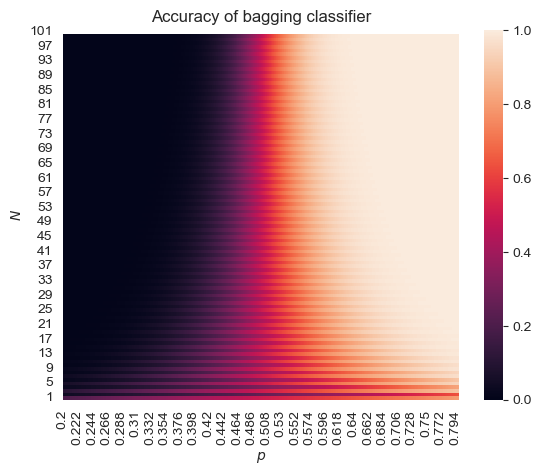

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(prob_matrix.astype(float))
plt.title('Accuracy of bagging classifier')
plt.grid(False)
plt.xlabel(r'$p$')
plt.ylabel(r'$N$')
plt.show()

계산 자원만 충분하다면 일반적으로 어떤 분류기든 배깅을 하는 것이 좋다. 그러나 배깅은 부스팅과 달리 성과가 좋지 않는 분류기의 정확도를 개선하지 못한다. 개별 학습기가 형편없는 분류기일 경우, 다수결 투표는 여전히 형편없을 것이다. 위 그림은 이 사실을 보여 준다. $p > \frac{1}{k}$보다 $\bar{\rho} \ll 1$이 더 쉽기 때문에 대개 배깅은 편향을 줄이기보다 분산을 줄이는 데 더 성공적이다